In [2]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt


# read GeoTIFF file
ds = gdal.Open('NZ24ne_DTM_1m.tif') #north east of NZ24
band = ds.GetRasterBand(1)
elevation_data = band.ReadAsArray()


In [2]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt


# read GeoTIFF file
ds = gdal.Open('NZ24ne_DTM_1m.tif') #north east of NZ24
band = ds.GetRasterBand(1)
elevation_data = band.ReadAsArray()


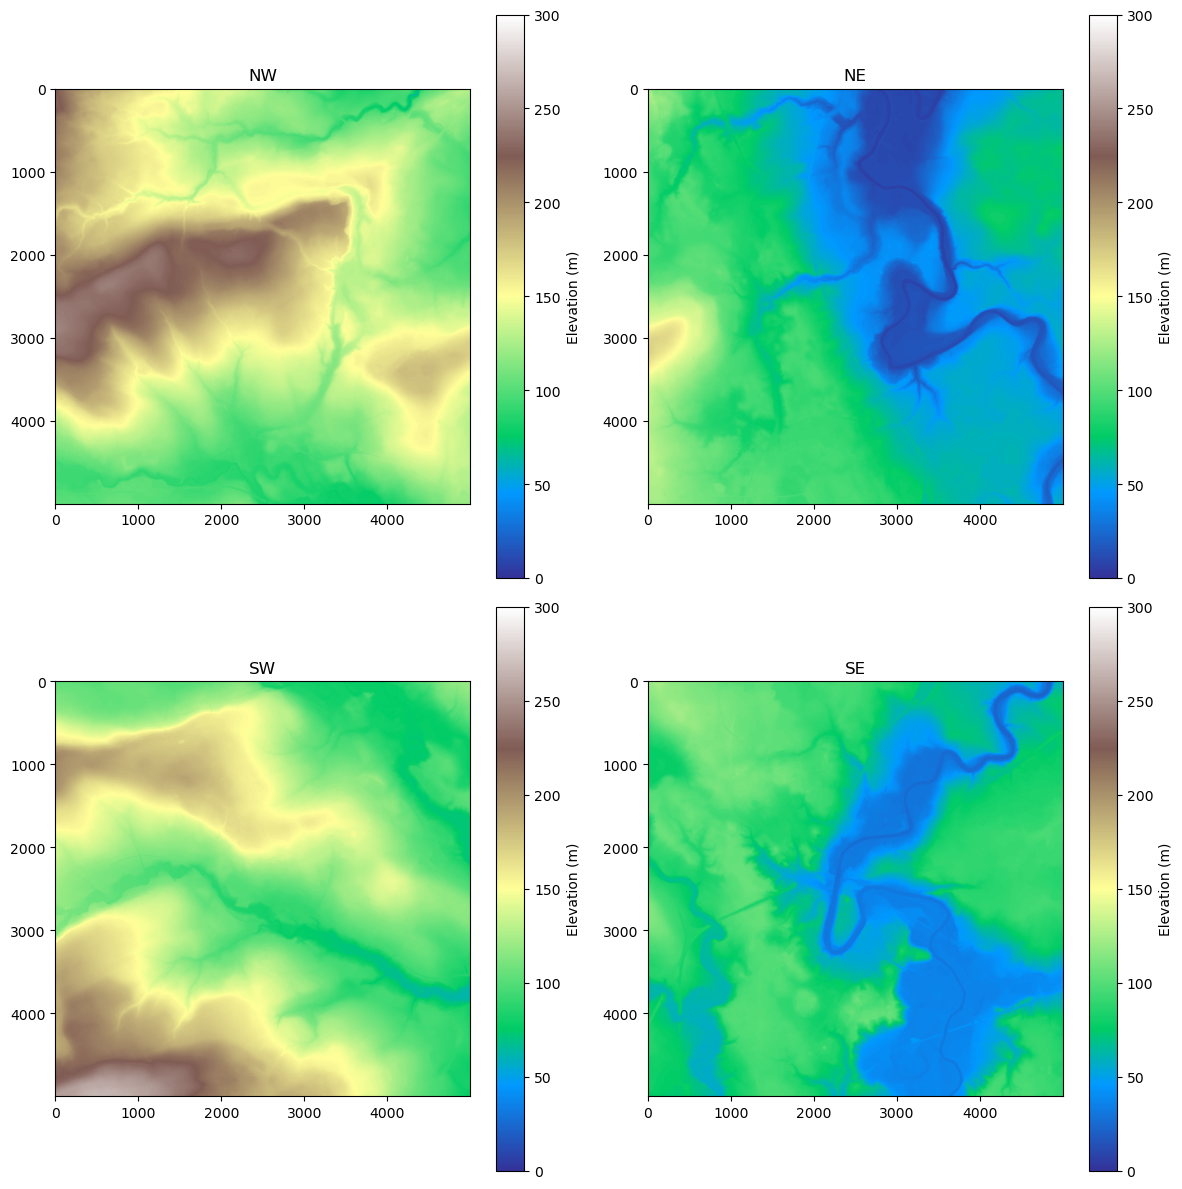

In [3]:
# 4 parts
file_NE = 'NZ24ne_DTM_1m.tif'
file_NW = 'NZ24nw_DTM_1m.tif'
file_SE = 'NZ24se_DTM_1m.tif'
file_SW = 'NZ24sw_DTM_1m.tif'

# open GeoTIFF files
ds_NE = gdal.Open(file_NE)
ds_NW = gdal.Open(file_NW)
ds_SE = gdal.Open(file_SE)
ds_SW = gdal.Open(file_SW)

# get band
band_NE = ds_NE.GetRasterBand(1)
band_NW = ds_NW.GetRasterBand(1)
band_SE = ds_SE.GetRasterBand(1)
band_SW = ds_SW.GetRasterBand(1)

# read array
array_NE = band_NE.ReadAsArray()
array_NW = band_NW.ReadAsArray()
array_SE = band_SE.ReadAsArray()
array_SW = band_SW.ReadAsArray()


# visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 12))


cmap = 'terrain'

axes[0, 0].imshow(array_NW, cmap=cmap, vmin=0, vmax=300)
axes[0, 0].set_title('NW')

axes[0, 1].imshow(array_NE, cmap=cmap, vmin=0, vmax=300)
axes[0, 1].set_title('NE')

axes[1, 0].imshow(array_SW, cmap=cmap, vmin=0, vmax=300)
axes[1, 0].set_title('SW')

axes[1, 1].imshow(array_SE, cmap=cmap, vmin=0, vmax=300)
axes[1, 1].set_title('SE')

for ax in axes.flat:
    cbar = plt.colorbar(ax.images[0], ax=ax, orientation='vertical')
    cbar.set_label('Elevation (m)')

plt.tight_layout()

plt.show()

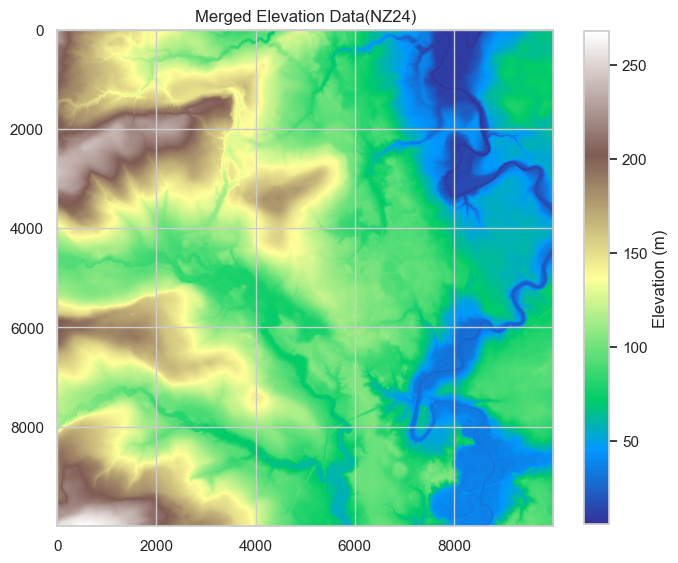

In [6]:
top = np.hstack((array_NW, array_NE))
bottom = np.hstack((array_SW, array_SE))
merged_array = np.vstack((top, bottom))

# visualization
plt.figure(figsize=(8,8))
cmap = 'terrain'

plt.imshow(merged_array, cmap=cmap)
plt.colorbar(shrink=0.8, label='Elevation (m)')
plt.title('Merged Elevation Data(NZ24)')


plt.savefig('NZ24.png', bbox_inches='tight')
plt.show()

In [5]:
import numpy as np

#split into blocks
def split_into_blocks(array, block_size):
    blocks = []
    positions = []
    for i in range(0, array.shape[0], block_size):
        for j in range(0, array.shape[1], block_size):
            block = array[i:i+block_size, j:j+block_size]
            if block.shape[0] == block_size and block.shape[1] == block_size:
                blocks.append(block)
                positions.append((i, j))
    return blocks, positions

map_data = merged_array

# set size
block_size = 250

# split the map_data
blocks = split_into_blocks(map_data, block_size)
print(f"Number of blocks: {len(blocks[0])}")  # 应该是 (10000/250) * (10000/250) = 1600 个块
#print(blocks[1])

Number of blocks: 1600


In [6]:
import numpy as np
from scipy.ndimage import generic_filter

# Topographic features
def calculate_slope_aspect(block):
    gy, gx = np.gradient(block)
    slope = np.sqrt(gx**2 + gy**2)
    aspect = np.arctan2(-gx, gy)
    return slope, aspect

def calculate_roughness(block):
    return np.std(block)


#TPI represents the height difference of a point relative to its surrounding neighborhood
def calculate_tpi(block):
    window_size = 3
    local_mean = generic_filter(block, np.mean, size=window_size)
    tpi = block - local_mean
    return tpi


In [9]:
features_list = []
counter = 1

for block in blocks[0]:
    slope, aspect = calculate_slope_aspect(block)
    roughness = calculate_roughness(block)
    tpi = calculate_tpi(block)
    print(f"循环到第 {counter} 个了")
    counter += 1  # 每次循环后计数器加1
    features = [
        slope.mean(), slope.std(), 
        aspect.mean(), aspect.std(), 
        roughness, 
        tpi.mean(), tpi.std()
    ]
    
    features_list.append(features)

features_array = np.array(features_list)
print(f"Extracted features shape: {features_array.shape}")


循环到第 1 个了
循环到第 2 个了
循环到第 3 个了
循环到第 4 个了
循环到第 5 个了
循环到第 6 个了
循环到第 7 个了
循环到第 8 个了
循环到第 9 个了
循环到第 10 个了
循环到第 11 个了
循环到第 12 个了
循环到第 13 个了
循环到第 14 个了
循环到第 15 个了
循环到第 16 个了
循环到第 17 个了
循环到第 18 个了
循环到第 19 个了
循环到第 20 个了
循环到第 21 个了
循环到第 22 个了
循环到第 23 个了
循环到第 24 个了
循环到第 25 个了
循环到第 26 个了
循环到第 27 个了
循环到第 28 个了
循环到第 29 个了
循环到第 30 个了
循环到第 31 个了
循环到第 32 个了
循环到第 33 个了
循环到第 34 个了
循环到第 35 个了
循环到第 36 个了
循环到第 37 个了
循环到第 38 个了
循环到第 39 个了
循环到第 40 个了
循环到第 41 个了
循环到第 42 个了
循环到第 43 个了
循环到第 44 个了
循环到第 45 个了
循环到第 46 个了
循环到第 47 个了
循环到第 48 个了
循环到第 49 个了
循环到第 50 个了
循环到第 51 个了
循环到第 52 个了
循环到第 53 个了
循环到第 54 个了
循环到第 55 个了
循环到第 56 个了
循环到第 57 个了
循环到第 58 个了
循环到第 59 个了
循环到第 60 个了
循环到第 61 个了
循环到第 62 个了
循环到第 63 个了
循环到第 64 个了
循环到第 65 个了
循环到第 66 个了
循环到第 67 个了
循环到第 68 个了
循环到第 69 个了
循环到第 70 个了
循环到第 71 个了
循环到第 72 个了
循环到第 73 个了
循环到第 74 个了
循环到第 75 个了
循环到第 76 个了
循环到第 77 个了
循环到第 78 个了
循环到第 79 个了
循环到第 80 个了
循环到第 81 个了
循环到第 82 个了
循环到第 83 个了
循环到第 84 个了
循环到第 85 个了
循环到第 86 个了
循环到第 87 个了
循环到第 88 个了
循环到第 89 个了
循环到第 90 个了
循环到第 91 个了
循环到第 92 

In [32]:
#np.save('features_array.npy', features_array)

In [14]:
merged_array = np.load('merged_array.npy')

In [31]:
import pandas as pd

column_names = ["Slope Mean", "Slope Std", "Aspect Mean", "Aspect Std", "Roughness", "TPI Mean", "TPI Std","Average Elevation"]

# save as CSV file
df = pd.DataFrame(features_array, columns=column_names)
df.to_csv('features_array.csv', index=False)

print("Array has been saved to features_array.csv with column names")

Array has been saved to features_array.csv with column names


In [3]:
loaded_array = np.load('features_array.npy')

In [4]:
features_array = loaded_array
features_array.shape

(1600, 8)

In [5]:
features_array[:, [0, 7]] = features_array[:, [7, 0]]

C:\Users\LYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LYA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

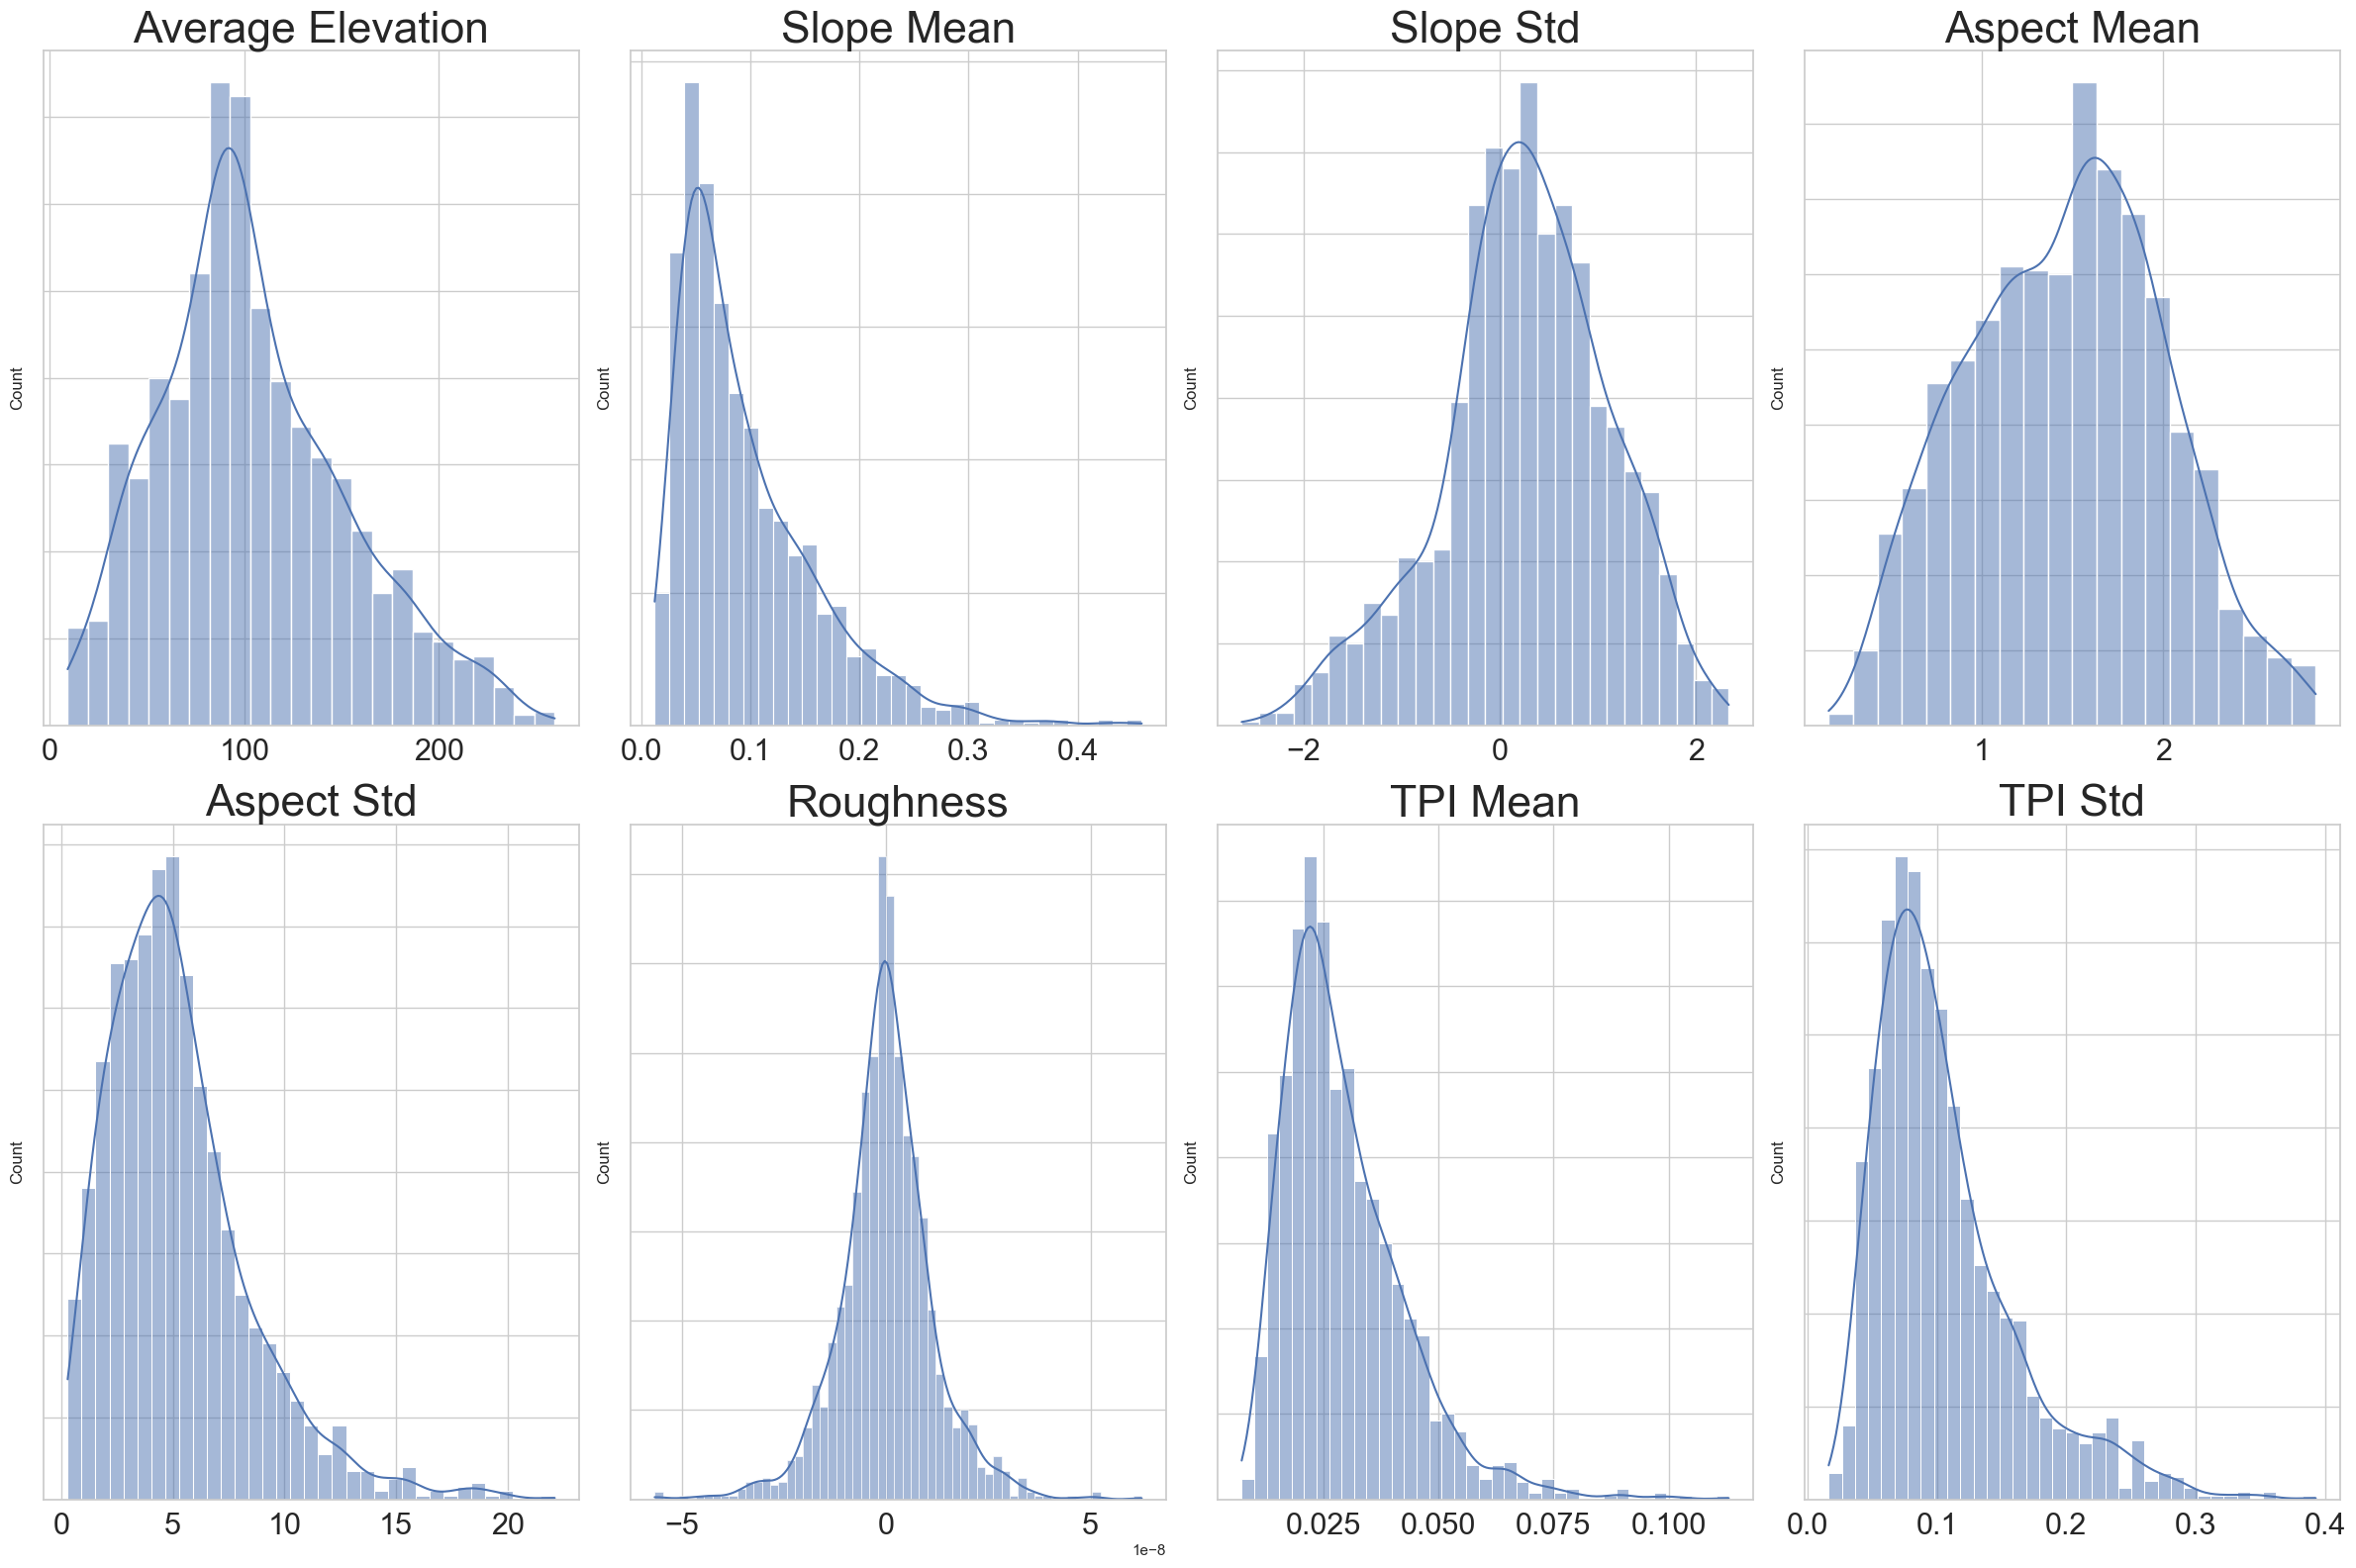

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# set Seaborn
sns.set(style="whitegrid")

# feature list
feature_names = [
     "Average Elevation",
    "Slope Mean", "Slope Std", 
    "Aspect Mean", "Aspect Std", 
    "Roughness", 
    "TPI Mean", "TPI Std" 
]

# histrogram
plt.figure(figsize=(24, 16))  # 调整长宽比例
for i, feature in enumerate(features_array.T):
    plt.subplot(2, 4, i + 1)
    sns.histplot(feature, kde=True)
    plt.title(feature_names[i], fontsize=32)
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.gca().set_yticklabels([])
                   
plt.tight_layout()
plt.savefig('NZ24_hist.png')  # 保存图像为 PNG 文件
plt.show()

In [12]:
features_array

array([[ 1.1391288e-01,  4.1396968e-02,  1.4645257e+00, ...,
         7.9430218e+00,  2.1240234e-08,  1.4653692e-02],
       [ 1.0894775e-01,  5.7796169e-02,  1.6109998e+00, ...,
         6.0082746e+00, -1.6845703e-08,  1.9511566e-02],
       [ 1.0571814e-01,  9.2581920e-02,  1.3813764e+00, ...,
         5.0186162e+00, -3.4179688e-09,  2.9900476e-02],
       ...,
       [ 2.0834748e-01,  2.0081845e-01, -1.2181438e-01, ...,
         5.9504085e+00, -4.8828124e-09,  4.6488855e-02],
       [ 5.2701890e-02,  5.9152987e-02,  3.5763741e-01, ...,
         1.6208159e+00,  7.8125000e-09,  2.4067529e-02],
       [ 6.5734036e-02,  7.8347459e-02,  5.8734483e-01, ...,
         2.0931211e+00,  3.6621093e-09,  2.4926025e-02]], dtype=float32)

In [21]:
Slope_mean_values = [sublist[1] for sublist in features_array]
Slope_std_values = [sublist[2] for sublist in features_array]
Aspect_mean_values = [sublist[3] for sublist in features_array]
Aspect_std_values = [sublist[4] for sublist in features_array]
Roughness_values = [sublist[5] for sublist in features_array]
TPI_mean_values = [sublist[6] for sublist in features_array]
TPI_std_values = [sublist[7] for sublist in features_array]
AverageHeight_values = [sublist[0] for sublist in features_array]
# 
Slope_mean_map_array = [Slope_mean_values[i * 40:(i + 1) * 40] for i in range(40)]
Slope_std_map_array = [Slope_std_values[i * 40:(i + 1) * 40] for i in range(40)]
Aspect_mean_map_array = [Aspect_mean_values[i * 40:(i + 1) * 40] for i in range(40)]
Aspect_std_map_array = [Aspect_std_values[i * 40:(i + 1) * 40] for i in range(40)]
Roughness_map_array = [Roughness_values[i * 40:(i + 1) * 40] for i in range(40)]
TPI_mean_map_array = [TPI_mean_values[i * 40:(i + 1) * 40] for i in range(40)]
TPI_std_map_array = [TPI_std_values[i * 40:(i + 1) * 40] for i in range(40)]
AverageHeight_map_array = [AverageHeight_values[i * 40:(i + 1) * 40] for i in range(40)]

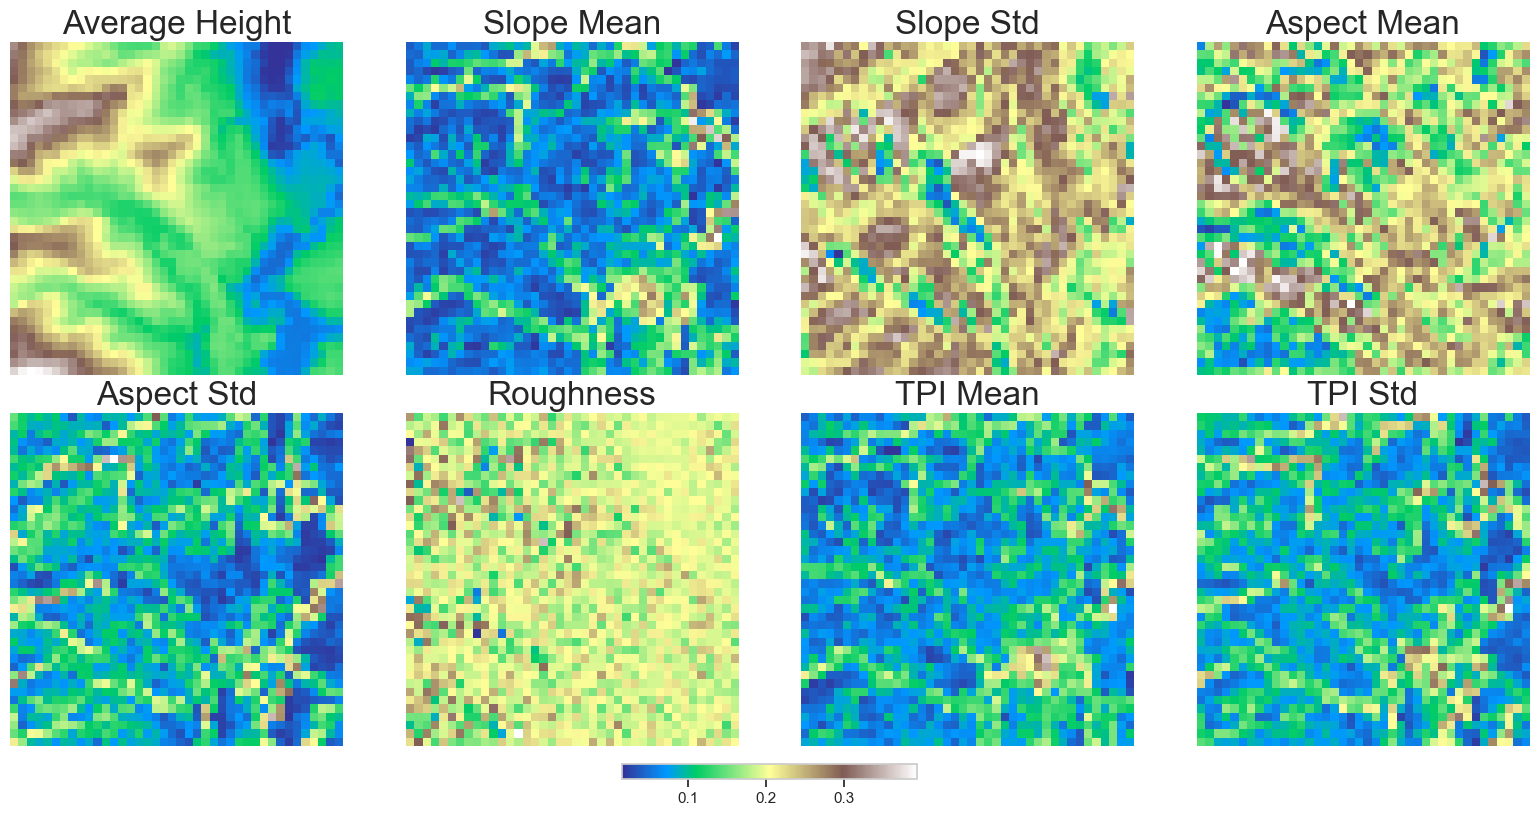

In [28]:
# title
titles = ["Average Height","Slope Mean", "Slope Std", 
          "Aspect Mean", "Aspect Std", 
          "Roughness", 
          "TPI Mean", "TPI Std"]

arrays = [AverageHeight_map_array, Slope_mean_map_array, Slope_std_map_array, 
          Aspect_mean_map_array, Aspect_std_map_array, 
          Roughness_map_array, 
          TPI_mean_map_array, TPI_std_map_array]


fig, ax = plt.subplots(2, 4, figsize=(16, 8))  # 调整高度以更好地适配

# 将 2x4 网格展平，便于在子图中循环
ax = ax.flatten()

# 绘制每个数组并设置相应的标题
for i in range(8):
    im = ax[i].imshow(arrays[i], cmap='terrain')
    ax[i].set_title(titles[i], fontsize=24)
    ax[i].axis('off')  # 如果不需要坐标轴，可以隐藏坐标轴

# 调整布局以防止重叠
plt.tight_layout()

# 为最后一个子图添加一个颜色条，以提供颜色映射的上下文
fig.colorbar(im, ax=ax, orientation='horizontal', fraction=0.02, pad=0.025)
cbar.ax.tick_params(labelsize=100)

plt.savefig('NZ24_features.png', bbox_inches='tight')  # 保存图像为 PNG 文件
plt.show()

In [12]:
def block_average(arr, block_size):
    shape = (arr.shape[0] // block_size, arr.shape[1] // block_size)
    sh = shape[0], block_size, shape[1], block_size
    return arr.reshape(sh).mean(-1).mean(1)



In [15]:
block_size = 250
block_average_array = block_average(merged_array, block_size)

# 将平均值的数组重塑为40x40
block_average_2d = block_average_array.reshape((40, 40))


(40, 40)

In [40]:
#no average height result

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read clusters
kmean_clusters = pd.read_csv('km_res_clusters.csv')

# read centers
kmean_centers = pd.read_csv('km_res_centers.csv')

print("k-mean Clusters:\n", kmean_clusters.head())
print("k-mean Centers:\n", kmean_centers.head())


# read clusters
hc_clusters = pd.read_csv('hc_clusters.csv')
hc_clusters.replace({1: 3, 2: 1}, inplace=True)
hc_clusters.replace(3, 2, inplace=True)

print("Hierarchical Clusters:\n", clusters.head())



k-mean Clusters:
    x
0  2
1  1
2  1
3  1
4  1
k-mean Centers:
    Slope.Mean  Slope.Std  Aspect.Mean  Aspect.Std  Roughness      TPI.Mean  \
0     0.08286   0.078131     0.319356    1.495614   3.731139 -7.294921e-11   
1     0.17063   0.148625     0.086161    1.381616   9.405995  2.576680e-10   

    TPI.Std  
0  0.026264  
1  0.038273  
Hierarchical Clusters:
    x
0  1
1  2
2  2
3  2
4  2


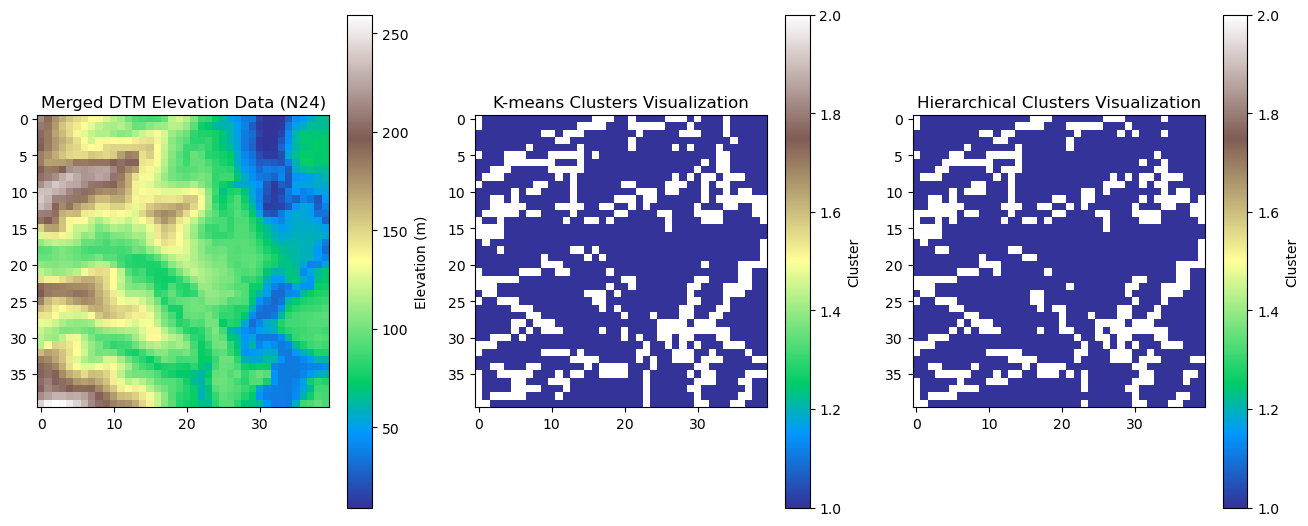

In [41]:
kmean_clusters_array = kmean_clusters.to_numpy().flatten()
kmean_clusters_2d = kmean_clusters_array.reshape((40, 40))

hc_clusters_array = hc_clusters.to_numpy().flatten()
hc_clusters_2d = hc_clusters_array.reshape((40, 40))


# plot
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

cmap = 'terrain'

# merged_array plot
im1 = axes[0].imshow(block_average_2d, cmap=cmap)
axes[0].set_title('Merged DTM Elevation Data (N24)')
fig.colorbar(im1, ax=axes[0], shrink=0.8, label='Elevation (m)')

# k-mean clusters_2d plot
im2 = axes[1].imshow(kmean_clusters_2d, cmap=cmap)
axes[1].set_title('K-means Clusters Visualization')
fig.colorbar(im2, ax=axes[1], shrink=0.8, label='Cluster')

# hierarchical clusters_2d plot
im3 = axes[2].imshow(hc_clusters_2d, cmap=cmap)
axes[2].set_title('Hierarchical Clusters Visualization')
fig.colorbar(im2, ax=axes[2], shrink=0.8, label='Cluster')

# show
plt.show()

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read clusters
kmean_clusters = pd.read_csv('km_res_clusters.csv')

# read centers
kmean_centers = pd.read_csv('km_res_centers.csv')

print("k-mean Clusters:\n", kmean_clusters.head())
print("k-mean Centers:\n", kmean_centers.head())


# read clusters
hc_clusters = pd.read_csv('hc_clusters.csv')
hc_clusters.replace({2: 4, 3: 2}, inplace=True)
hc_clusters.replace(4, 3, inplace=True)

print("Hierarchical Clusters:\n", hc_clusters.head())



k-mean Clusters:
    x
0  1
1  1
2  1
3  1
4  1
k-mean Centers:
    Slope.Mean  Slope.Std  Aspect.Mean  Aspect.Std  Roughness      TPI.Mean  \
0    0.119694   0.101297     0.329596    1.405369   6.151634 -3.517998e-10   
1    0.200173   0.181707    -0.113339    1.325592  11.666004  3.927341e-10   
2    0.069655   0.070873     0.288647    1.555313   2.752479  2.455166e-10   

    TPI.Std  
0  0.030194  
1  0.043344  
2  0.025188  
Hierarchical Clusters:
    x
0  1
1  2
2  2
3  2
4  2


In [37]:
kmean_clusters_array = kmean_clusters.to_numpy().flatten()
kmean_clusters_2d = kmean_clusters_array.reshape((40, 40))

hc_clusters_array = hc_clusters.to_numpy().flatten()
hc_clusters_2d = hc_clusters_array.reshape((40, 40))


# plot
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

cmap = 'terrain'

# merged_array plot
im1 = axes[0].imshow(block_average_2d, cmap=cmap)
axes[0].set_title('Merged DTM Elevation Data (N24)')
fig.colorbar(im1, ax=axes[0], shrink=0.8, label='Elevation (m)')

# k-mean clusters_2d plot
im2 = axes[1].imshow(kmean_clusters_2d, cmap=cmap)
axes[1].set_title('K-means Clusters Visualization')
fig.colorbar(im2, ax=axes[1], shrink=0.8, label='Cluster')

# hierarchical clusters_2d plot
im3 = axes[2].imshow(hc_clusters_2d, cmap=cmap)
axes[2].set_title('Hierarchical Clusters Visualization')
fig.colorbar(im2, ax=axes[2], shrink=0.8, label='Cluster')

# show
plt.show()

NameError: name 'kmean_clusters' is not defined

In [7]:
#average height added 2 clusters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read clusters
kmean_clusters_2 = pd.read_csv('km_res_clusters_2.csv')

# read centers
kmean_centers_2 = pd.read_csv('km_res_centers_2.csv')

print("k-mean Clusters:\n", kmean_clusters_2.head())
print("k-mean Centers:\n", kmean_centers_2.head())


# read clusters
hc_clusters_2 = pd.read_csv('hc_clusters_2.csv')
hc_clusters_2.replace({1: 3, 2: 1}, inplace=True)
hc_clusters_2.replace(3, 2, inplace=True)

print("Hierarchical Clusters:\n", hc_clusters_2.head())



k-mean Clusters:
    x
0  2
1  2
2  2
3  2
4  2
k-mean Centers:
    Slope.Mean  Slope.Std  Aspect.Mean  Aspect.Std  Roughness      TPI.Mean  \
0    0.108246   0.109596     0.152981    1.538942   4.913258  3.478833e-11   
1    0.101544   0.070200     0.474590    1.313326   5.890369 -2.764738e-11   

    TPI.Std  Average.Elevation  
0  0.032146          77.047687  
1  0.023832         161.092197  
Hierarchical Clusters:
    x
0  2
1  2
2  2
3  2
4  2


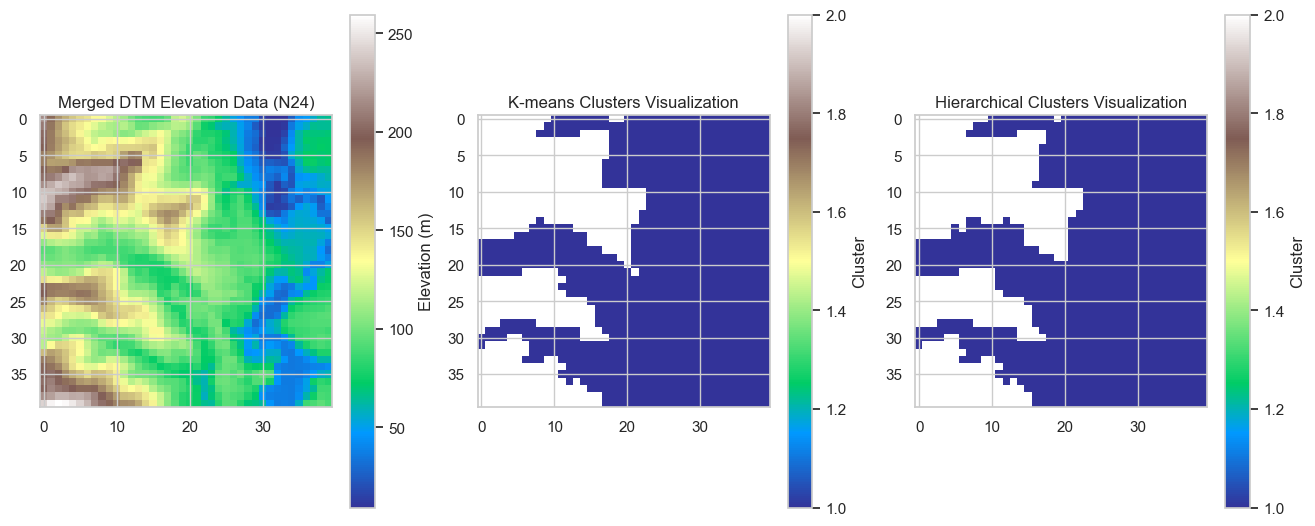

In [17]:
kmean_clusters_array_2 = kmean_clusters_2.to_numpy().flatten()
kmean_clusters_2d_2 = kmean_clusters_array_2.reshape((40, 40))

hc_clusters_array_2 = hc_clusters_2.to_numpy().flatten()
hc_clusters_2d_2 = hc_clusters_array_2.reshape((40, 40))


# plot
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

cmap = 'terrain'

# merged_array plot
im1 = axes[0].imshow(block_average_2d, cmap=cmap)
axes[0].set_title('Merged DTM Elevation Data (N24)')
fig.colorbar(im1, ax=axes[0], shrink=0.8, label='Elevation (m)')

# k-mean clusters_2d plot
im2 = axes[1].imshow(kmean_clusters_2d_2, cmap=cmap)
axes[1].set_title('K-means Clusters Visualization')
fig.colorbar(im2, ax=axes[1], shrink=0.8, label='Cluster')

# hierarchical clusters_2d plot
im3 = axes[2].imshow(hc_clusters_2d_2, cmap=cmap)
axes[2].set_title('Hierarchical Clusters Visualization')
fig.colorbar(im2, ax=axes[2], shrink=0.8, label='Cluster')

# show
plt.show()

In [8]:
#average height added 3 clusters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read clusters
kmean_clusters_3 = pd.read_csv('km_res_clusters_3.csv')

# read centers
kmean_centers_3 = pd.read_csv('km_res_centers_3.csv')

print("k-mean Clusters:\n", kmean_clusters_3.head())
print("k-mean Centers:\n", kmean_centers_3.head())


# read clusters
hc_clusters_3 = pd.read_csv('hc_clusters_3.csv')
#hc_clusters_2.replace({1: 3, 2: 1}, inplace=True)
#hc_clusters_2.replace(3, 2, inplace=True)

print("Hierarchical Clusters:\n", hc_clusters_3.head())



k-mean Clusters:
    x
0  1
1  1
2  1
3  1
4  1
k-mean Centers:
    Slope.Mean  Slope.Std  Aspect.Mean  Aspect.Std  Roughness      TPI.Mean  \
0    0.105190   0.070588     0.513593    1.270339   6.245701 -3.094025e-10   
1    0.122372   0.133385     0.124587    1.490556   5.550251  2.681282e-10   
2    0.096905   0.087395     0.217490    1.540966   4.575639  1.539554e-11   

    TPI.Std  Average.Elevation  
0  0.023445         175.245142  
1  0.036439          50.847904  
2  0.028104         103.087903  
Hierarchical Clusters:
    x
0  1
1  1
2  2
3  2
4  2


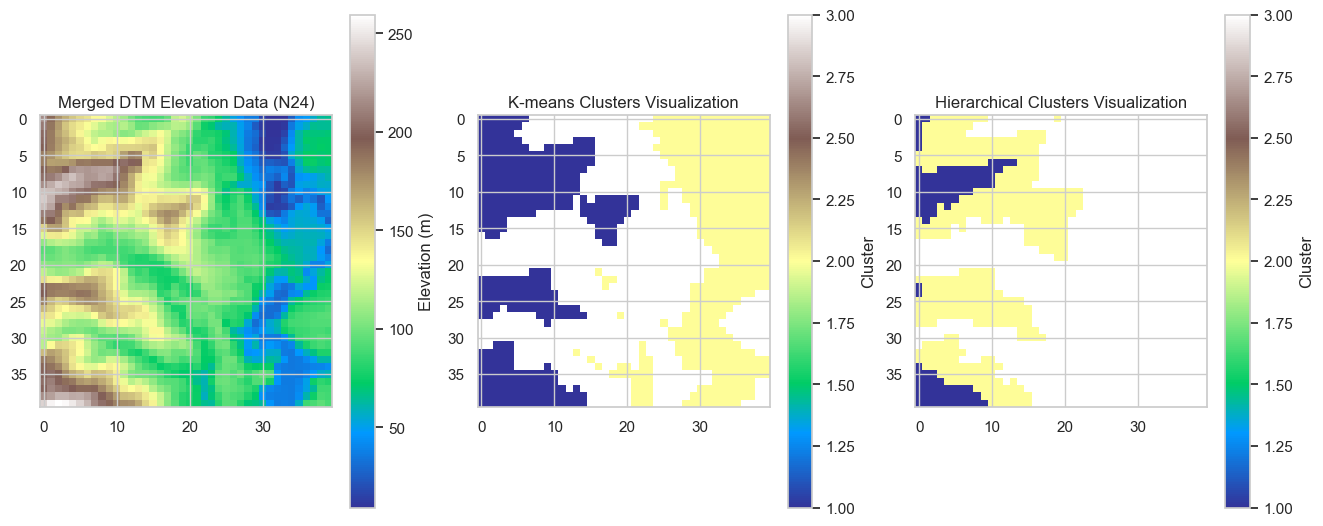

In [18]:
kmean_clusters_array_3 = kmean_clusters_3.to_numpy().flatten()
kmean_clusters_2d_3 = kmean_clusters_array_3.reshape((40, 40))

hc_clusters_array_3 = hc_clusters_3.to_numpy().flatten()
hc_clusters_2d_3 = hc_clusters_array_3.reshape((40, 40))


# plot
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

cmap = 'terrain'

# merged_array plot
im1 = axes[0].imshow(block_average_2d, cmap=cmap)
axes[0].set_title('Merged DTM Elevation Data (N24)')
fig.colorbar(im1, ax=axes[0], shrink=0.8, label='Elevation (m)')

# k-mean clusters_2d plot
im2 = axes[1].imshow(kmean_clusters_2d_3, cmap=cmap)
axes[1].set_title('K-means Clusters Visualization')
fig.colorbar(im2, ax=axes[1], shrink=0.8, label='Cluster')

# hierarchical clusters_2d plot
im3 = axes[2].imshow(hc_clusters_2d_3, cmap=cmap)
axes[2].set_title('Hierarchical Clusters Visualization')
fig.colorbar(im2, ax=axes[2], shrink=0.8, label='Cluster')

# show
plt.show()

In [9]:
#4 clusters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read clusters
kmean_clusters_4 = pd.read_csv('km_res_clusters_4.csv')

# read centers
kmean_centers_4 = pd.read_csv('km_res_centers_4.csv')

print("k-mean Clusters:\n", kmean_clusters_4.head())
print("k-mean Centers:\n", kmean_centers_4.head())


# read clusters
hc_clusters_4 = pd.read_csv('hc_clusters_4.csv')
hc_clusters_4.replace({1: 5, 4: 1}, inplace=True)
hc_clusters_4.replace(5, 4, inplace=True)

print("Hierarchical Clusters:\n", hc_clusters_4.head())


k-mean Clusters:
    x
0  4
1  4
2  4
3  2
4  2
k-mean Centers:
    Slope.Mean  Slope.Std  Aspect.Mean  Aspect.Std  Roughness      TPI.Mean  \
0    0.123816   0.139029     0.093590    1.486906   5.671904  3.063399e-10   
1    0.100461   0.073040     0.424943    1.354672   5.619269  1.883920e-10   
2    0.100233   0.095481     0.161234    1.581007   4.466526 -2.480637e-10   
3    0.103444   0.066117     0.591320    1.230835   6.336890  2.668209e-11   

    TPI.Std  Average.Elevation  
0  0.037285          45.394016  
1  0.024824         138.482193  
2  0.029659          91.847511  
3  0.022508         197.793358  
Hierarchical Clusters:
    x
0  4
1  4
2  2
3  2
4  2


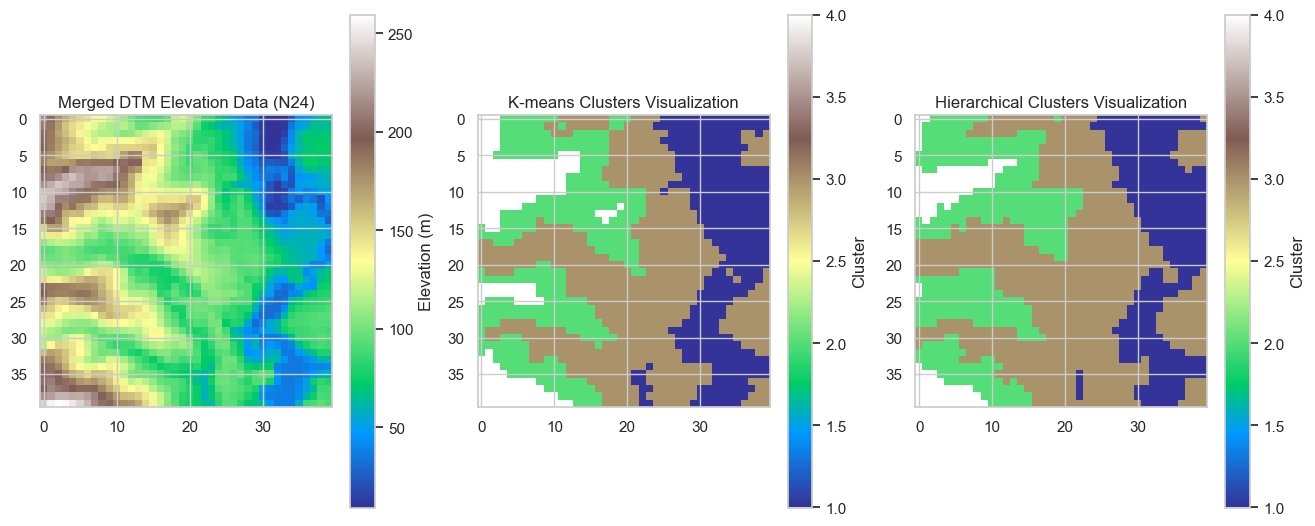

In [19]:
kmean_clusters_array_4 = kmean_clusters_4.to_numpy().flatten()
kmean_clusters_2d_4 = kmean_clusters_array_4.reshape((40, 40))

hc_clusters_array_4 = hc_clusters_4.to_numpy().flatten()
hc_clusters_2d_4 = hc_clusters_array_4.reshape((40, 40))


# plot
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

cmap = 'terrain'

# merged_array plot
im1 = axes[0].imshow(block_average_2d, cmap=cmap)
axes[0].set_title('Merged DTM Elevation Data (N24)')
fig.colorbar(im1, ax=axes[0], shrink=0.8, label='Elevation (m)')

# k-mean clusters_2d plot
im2 = axes[1].imshow(kmean_clusters_2d_4, cmap=cmap)
axes[1].set_title('K-means Clusters Visualization')
fig.colorbar(im2, ax=axes[1], shrink=0.8, label='Cluster')

# hierarchical clusters_2d plot
im3 = axes[2].imshow(hc_clusters_2d_4, cmap=cmap)
axes[2].set_title('Hierarchical Clusters Visualization')
fig.colorbar(im2, ax=axes[2], shrink=0.8, label='Cluster')

# show
plt.show()

In [10]:
#5 clusters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read clusters
kmean_clusters_5 = pd.read_csv('km_res_clusters_5.csv')

# read centers
kmean_centers_5 = pd.read_csv('km_res_centers_5.csv')

print("k-mean Clusters:\n", kmean_clusters_5.head())
print("k-mean Centers:\n", kmean_centers_5.head())


# read clusters
hc_clusters_5 = pd.read_csv('hc_clusters_5.csv')
hc_clusters_5.replace({5: 6, 4: 5}, inplace=True)
hc_clusters_5.replace(6, 4, inplace=True)



print("Hierarchical Clusters:\n", hc_clusters_5.head())


k-mean Clusters:
    x
0  4
1  4
2  2
3  2
4  2
k-mean Centers:
    Slope.Mean  Slope.Std  Aspect.Mean  Aspect.Std  Roughness      TPI.Mean  \
0    0.093023   0.075048     0.332951    1.445492   4.878912  3.863727e-10   
1    0.105017   0.074392     0.453846    1.319948   6.046160 -5.505620e-10   
2    0.103112   0.100176     0.143662    1.595017   4.449604 -1.443565e-10   
3    0.104223   0.063615     0.598145    1.203341   6.432729 -2.004135e-11   
4    0.124883   0.141373     0.092757    1.485402   5.764666  3.227923e-10   

    TPI.Std  Average.Elevation  
0  0.026079         117.893596  
1  0.024309         155.578396  
2  0.030455          86.252309  
3  0.022079         206.160874  
4  0.037624          43.892561  
Hierarchical Clusters:
    x
0  1
1  1
2  2
3  2
4  2


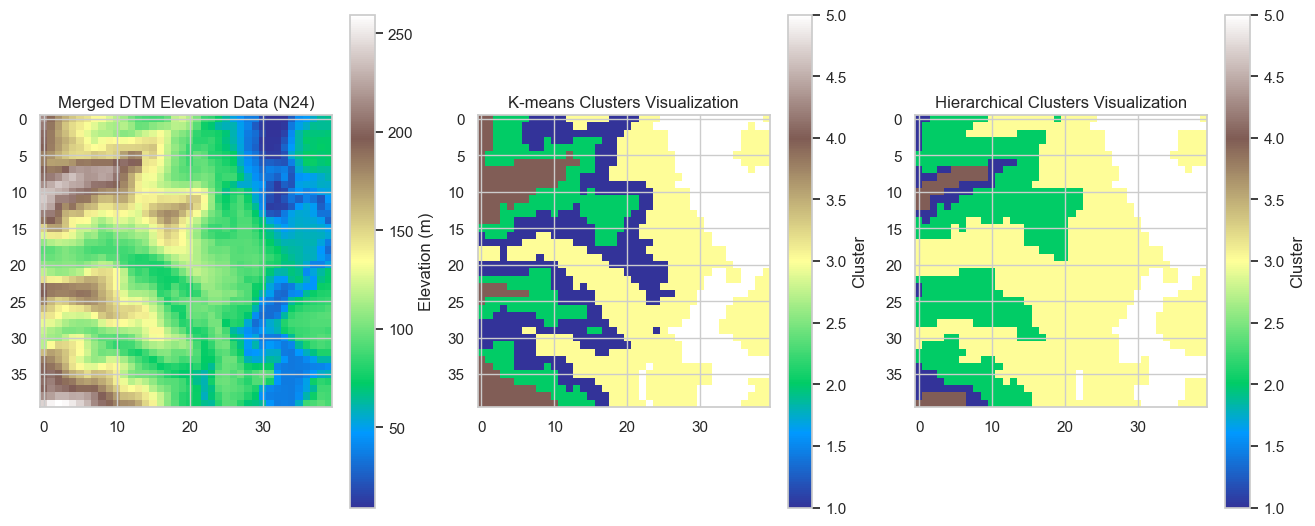

In [20]:
kmean_clusters_array_5 = kmean_clusters_5.to_numpy().flatten()
kmean_clusters_2d_5 = kmean_clusters_array_5.reshape((40, 40))

hc_clusters_array_5 = hc_clusters_5.to_numpy().flatten()
hc_clusters_2d_5 = hc_clusters_array_5.reshape((40, 40))


# plot
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

cmap = 'terrain'

# merged_array plot
im1 = axes[0].imshow(block_average_2d, cmap=cmap)
axes[0].set_title('Merged DTM Elevation Data (N24)')
fig.colorbar(im1, ax=axes[0], shrink=0.8, label='Elevation (m)')

# k-mean clusters_2d plot
im2 = axes[1].imshow(kmean_clusters_2d_5, cmap=cmap)
axes[1].set_title('K-means Clusters Visualization')
fig.colorbar(im2, ax=axes[1], shrink=0.8, label='Cluster')

# hierarchical clusters_2d plot
im3 = axes[2].imshow(hc_clusters_2d_5, cmap=cmap)
axes[2].set_title('Hierarchical Clusters Visualization')
fig.colorbar(im2, ax=axes[2], shrink=0.8, label='Cluster')

# show
plt.show()

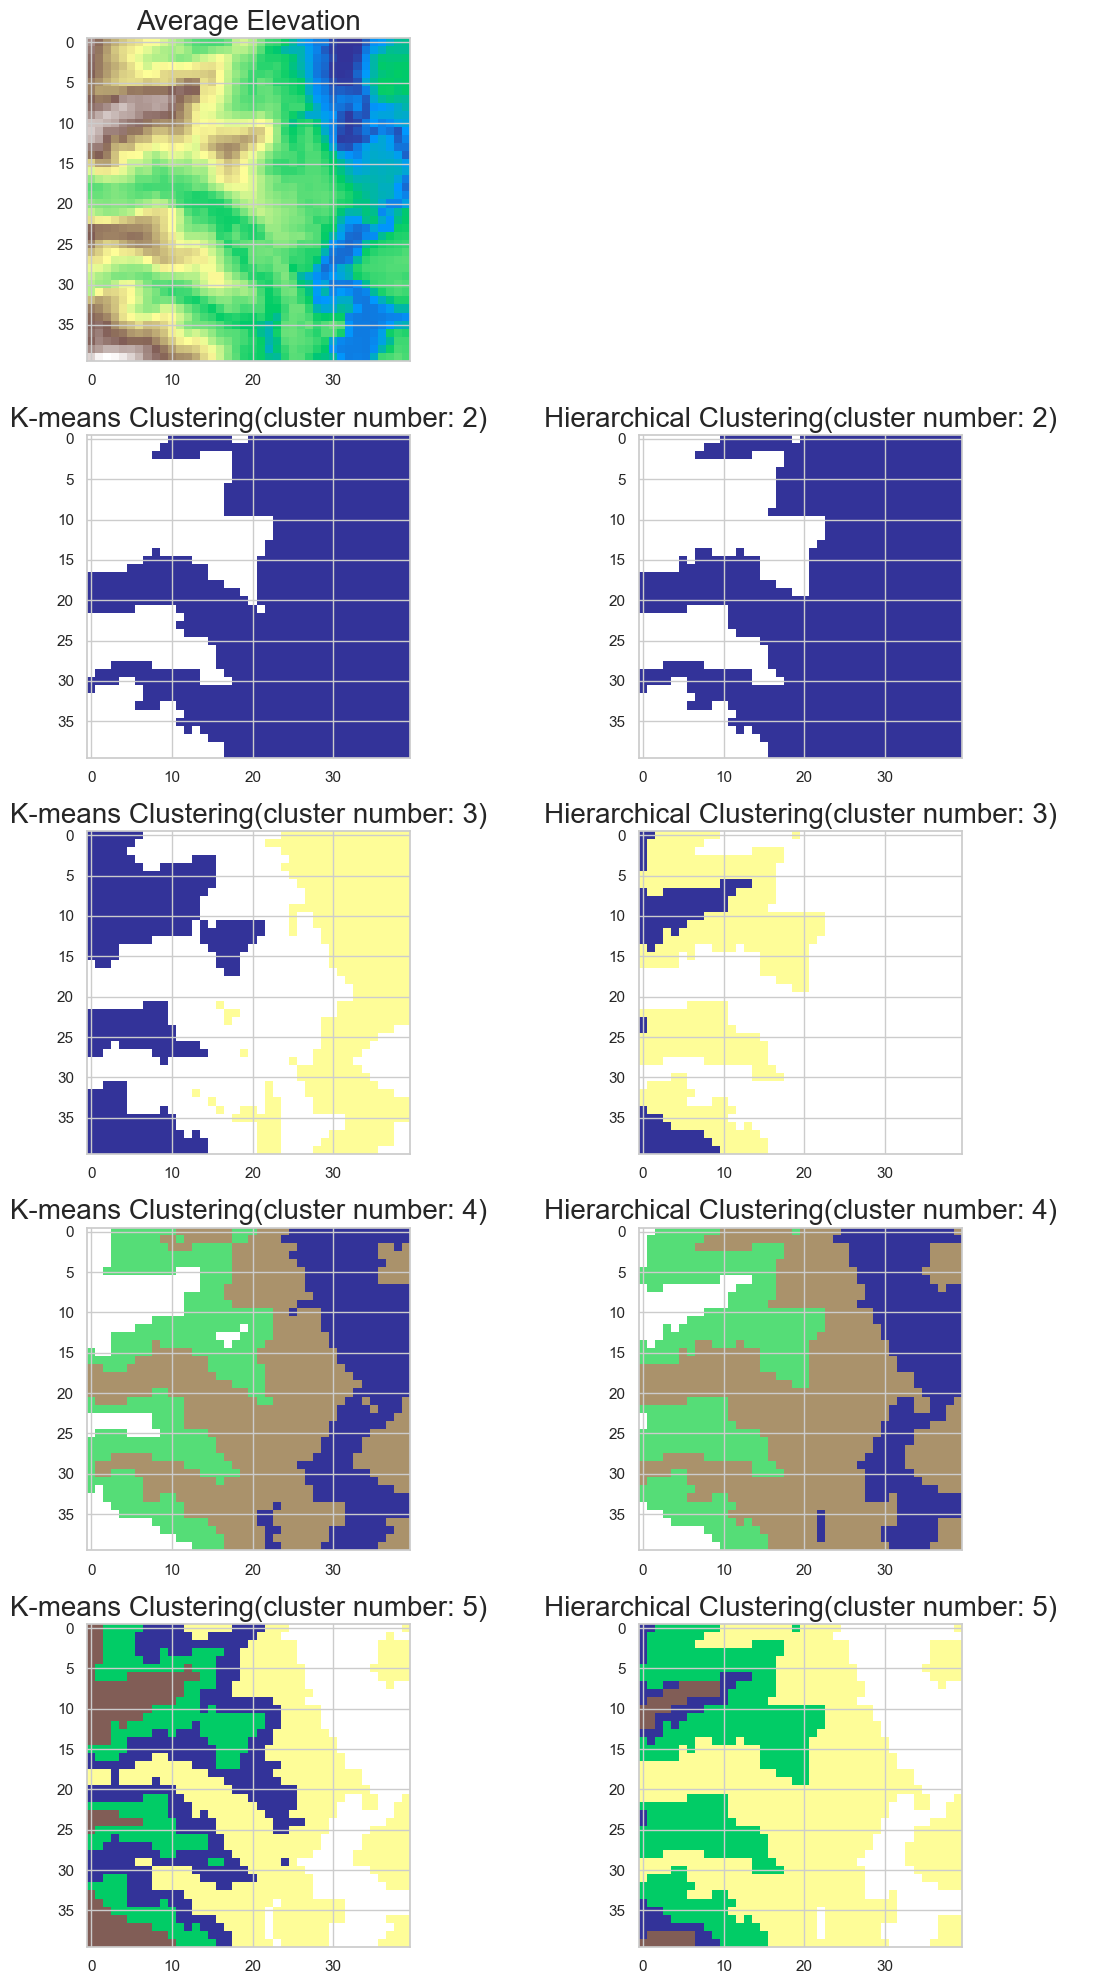

In [21]:
fig, ax = plt.subplots(5, 2, figsize=(12, 20))

cmap = 'terrain'

# 第一行：绘制 block_average_2d，在左侧显示，右侧保持空白
ax[0, 0].imshow(block_average_2d, cmap=cmap)
ax[0, 0].set_title('Average Elevation',fontsize=20)
#ax[0, 0].axis('off')  # 隐藏坐标轴

# 右边保持空白
ax[0, 1].axis('off')

# 第二行到第五行：绘制 K-means 和层次聚类的结果
kmean_clusters = [kmean_clusters_2d_2, kmean_clusters_2d_3, kmean_clusters_2d_4, kmean_clusters_2d_5]
hc_clusters = [hc_clusters_2d_2, hc_clusters_2d_3, hc_clusters_2d_4, hc_clusters_2d_5]


for i in range(1,5):
    # 左侧绘制 K-means 结果
    ax[i, 0].imshow(kmean_clusters[i-1], cmap=cmap)
    ax[i, 0].set_title(f'K-means Clustering(cluster number: {i+1})', fontsize=20)

    # 右侧绘制层次聚类结果
    ax[i, 1].imshow(hc_clusters[i-1], cmap=cmap)
    ax[i, 1].set_title(f'Hierarchical Clustering(cluster number: {i+1})', fontsize=20)

# 调整布局以避免重叠
plt.tight_layout()

plt.savefig('NZ24_UL.png', bbox_inches='tight')  # 保存图像为 PNG 文件

# 显示图像
plt.show()